# Glass Identification

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information-

1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

•1- building_windows_float_processed
•2- building_windows_non_float_processed
•3- vehicle_windows_float_processed
•4- vehicle_windows_non_float_processed (none in this database)
•5- containers
•6- tableware
•7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

#### Dataset Link-

• https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

•	https://github.com/dsrscientist/dataset3

In [23]:
from IPython.display import Image
Image(url="https://projectsbasedlearning.com/wp-content/uploads/2020/12/Glass-Identification.png", width=1000, height=800)

In [25]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
from sklearn import datasets

import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the train and test datasets from Kaggle to create two DataFrames using Pandas
glass_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header =None)
glass_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [30]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
glass_df.shape

(214, 11)

In [12]:
glass_df[10].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [14]:
glass_df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

<AxesSubplot:xlabel='10', ylabel='count'>

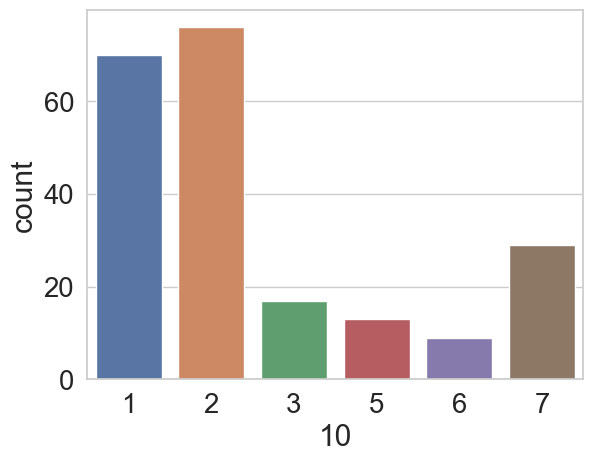

In [15]:
glass_df[10].value_counts()
    
    
sns.countplot(x=10, data=glass_df)

# Data processing

Adding meaningful column/attribute names

In [21]:
names = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
glass_df.columns = names
glass_df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
#remove unnecessary columns
glass_df = glass_df.drop('ID',1)

In [29]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Data Visualization

Using univariate plots

In [31]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

x = glass_df[features]
y = glass_df[label]

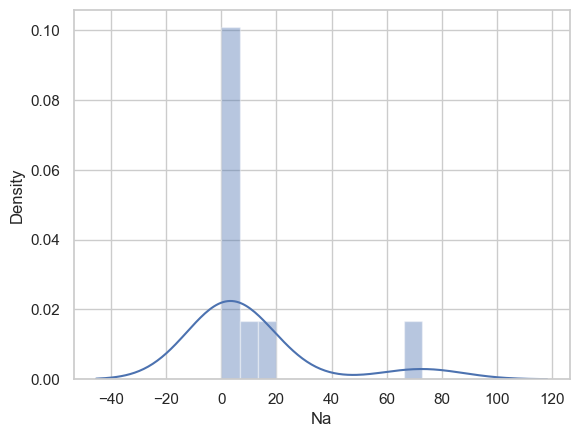

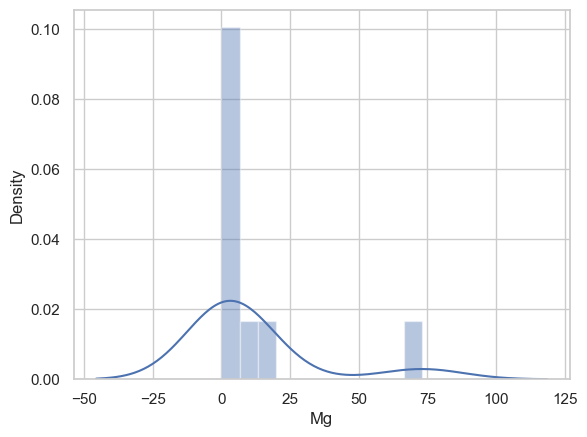

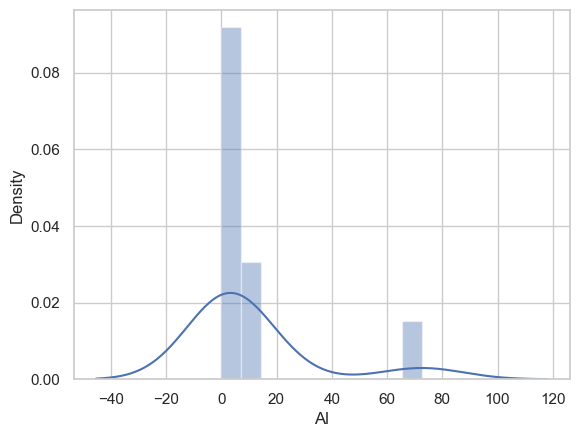

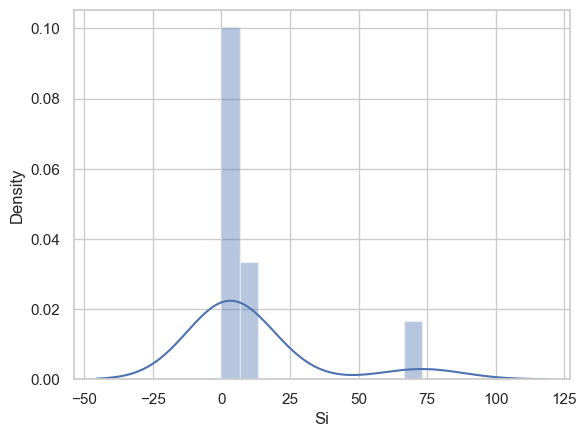

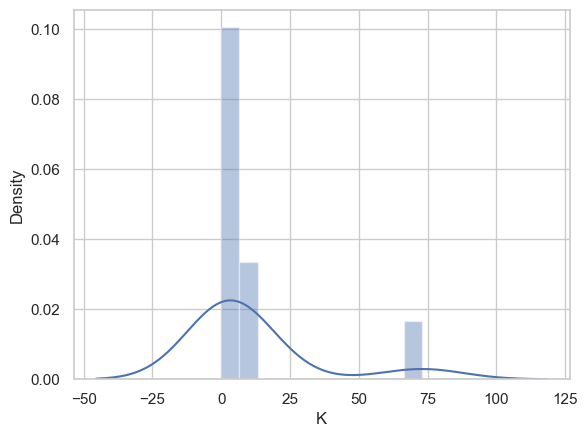

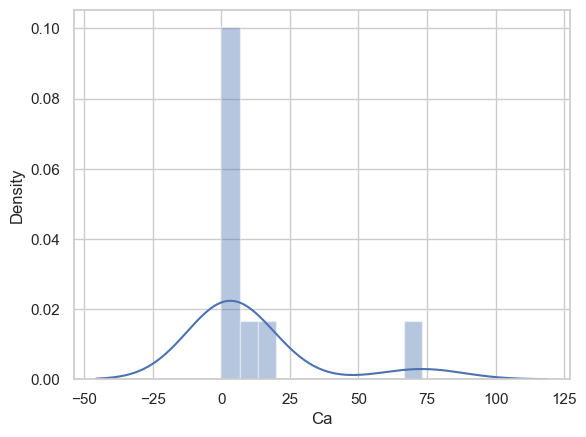

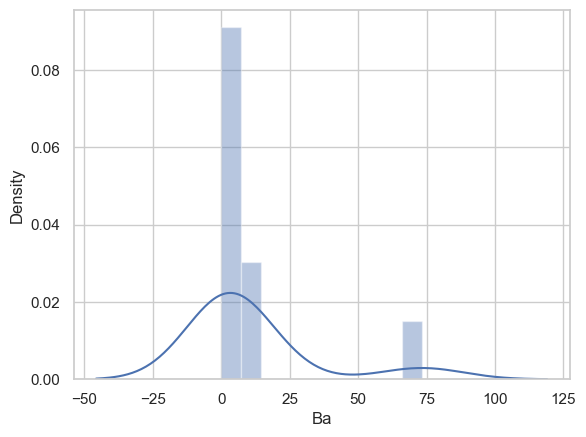

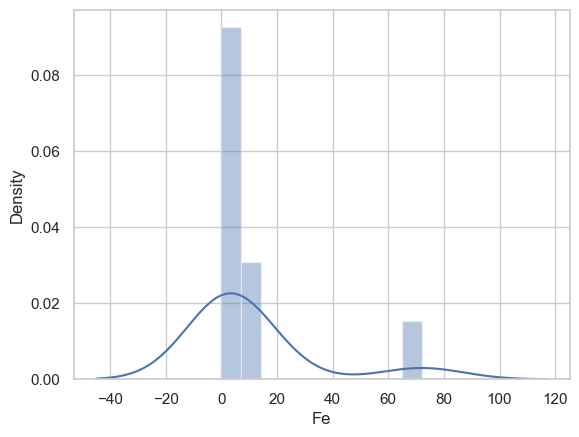

In [32]:
x2 = x.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

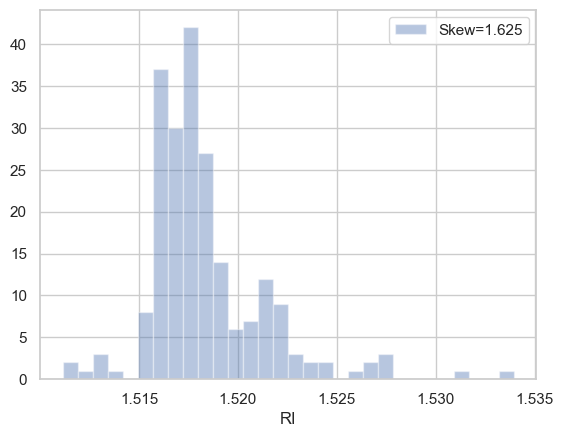

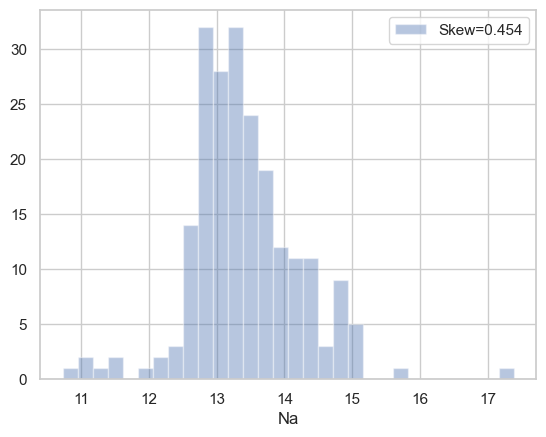

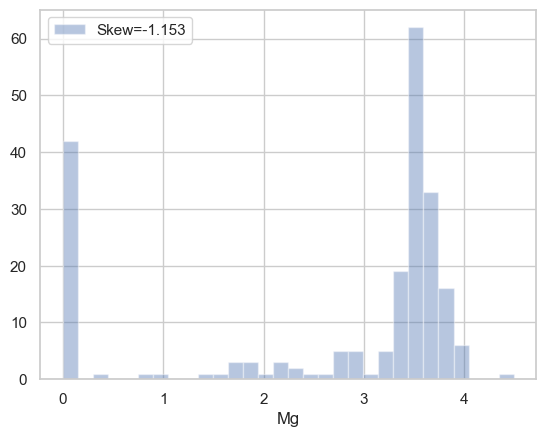

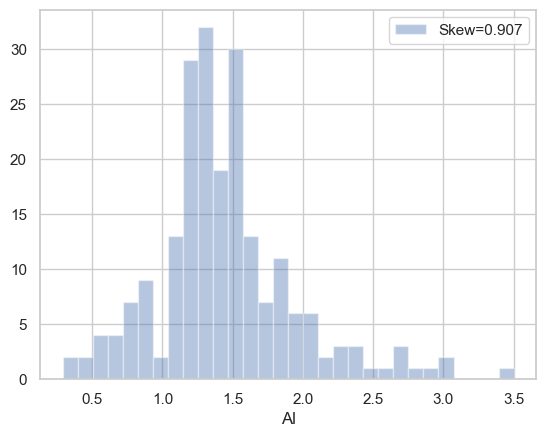

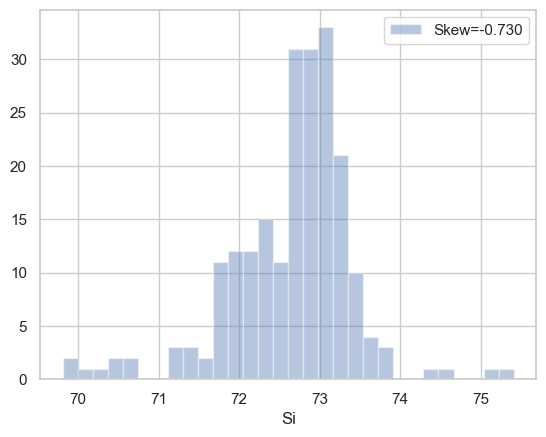

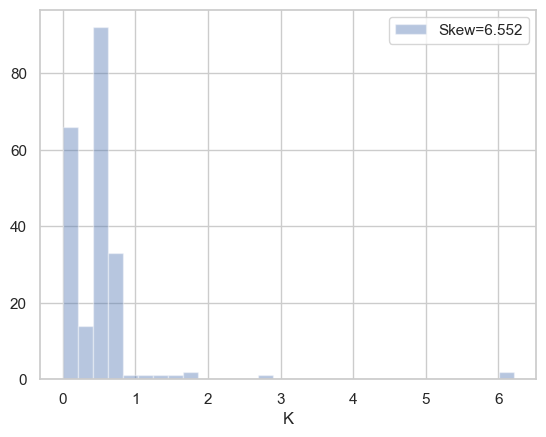

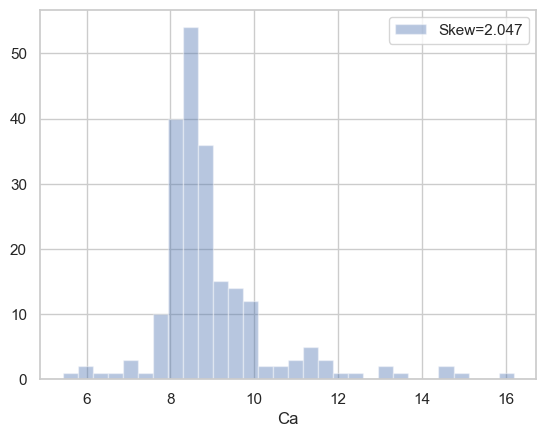

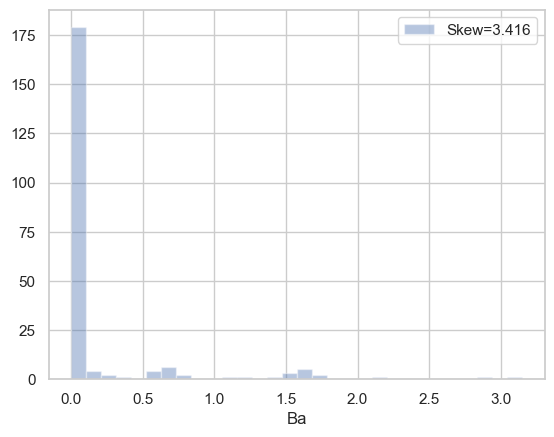

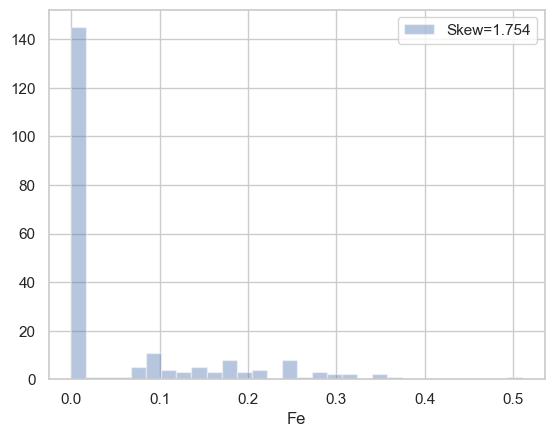

In [34]:
for feat in features:
    skew = glass_df[feat].skew()
    sns.distplot(glass_df[feat],kde = False, label='Skew=%.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Using Multivariate Plots

<Figure size 800x800 with 0 Axes>

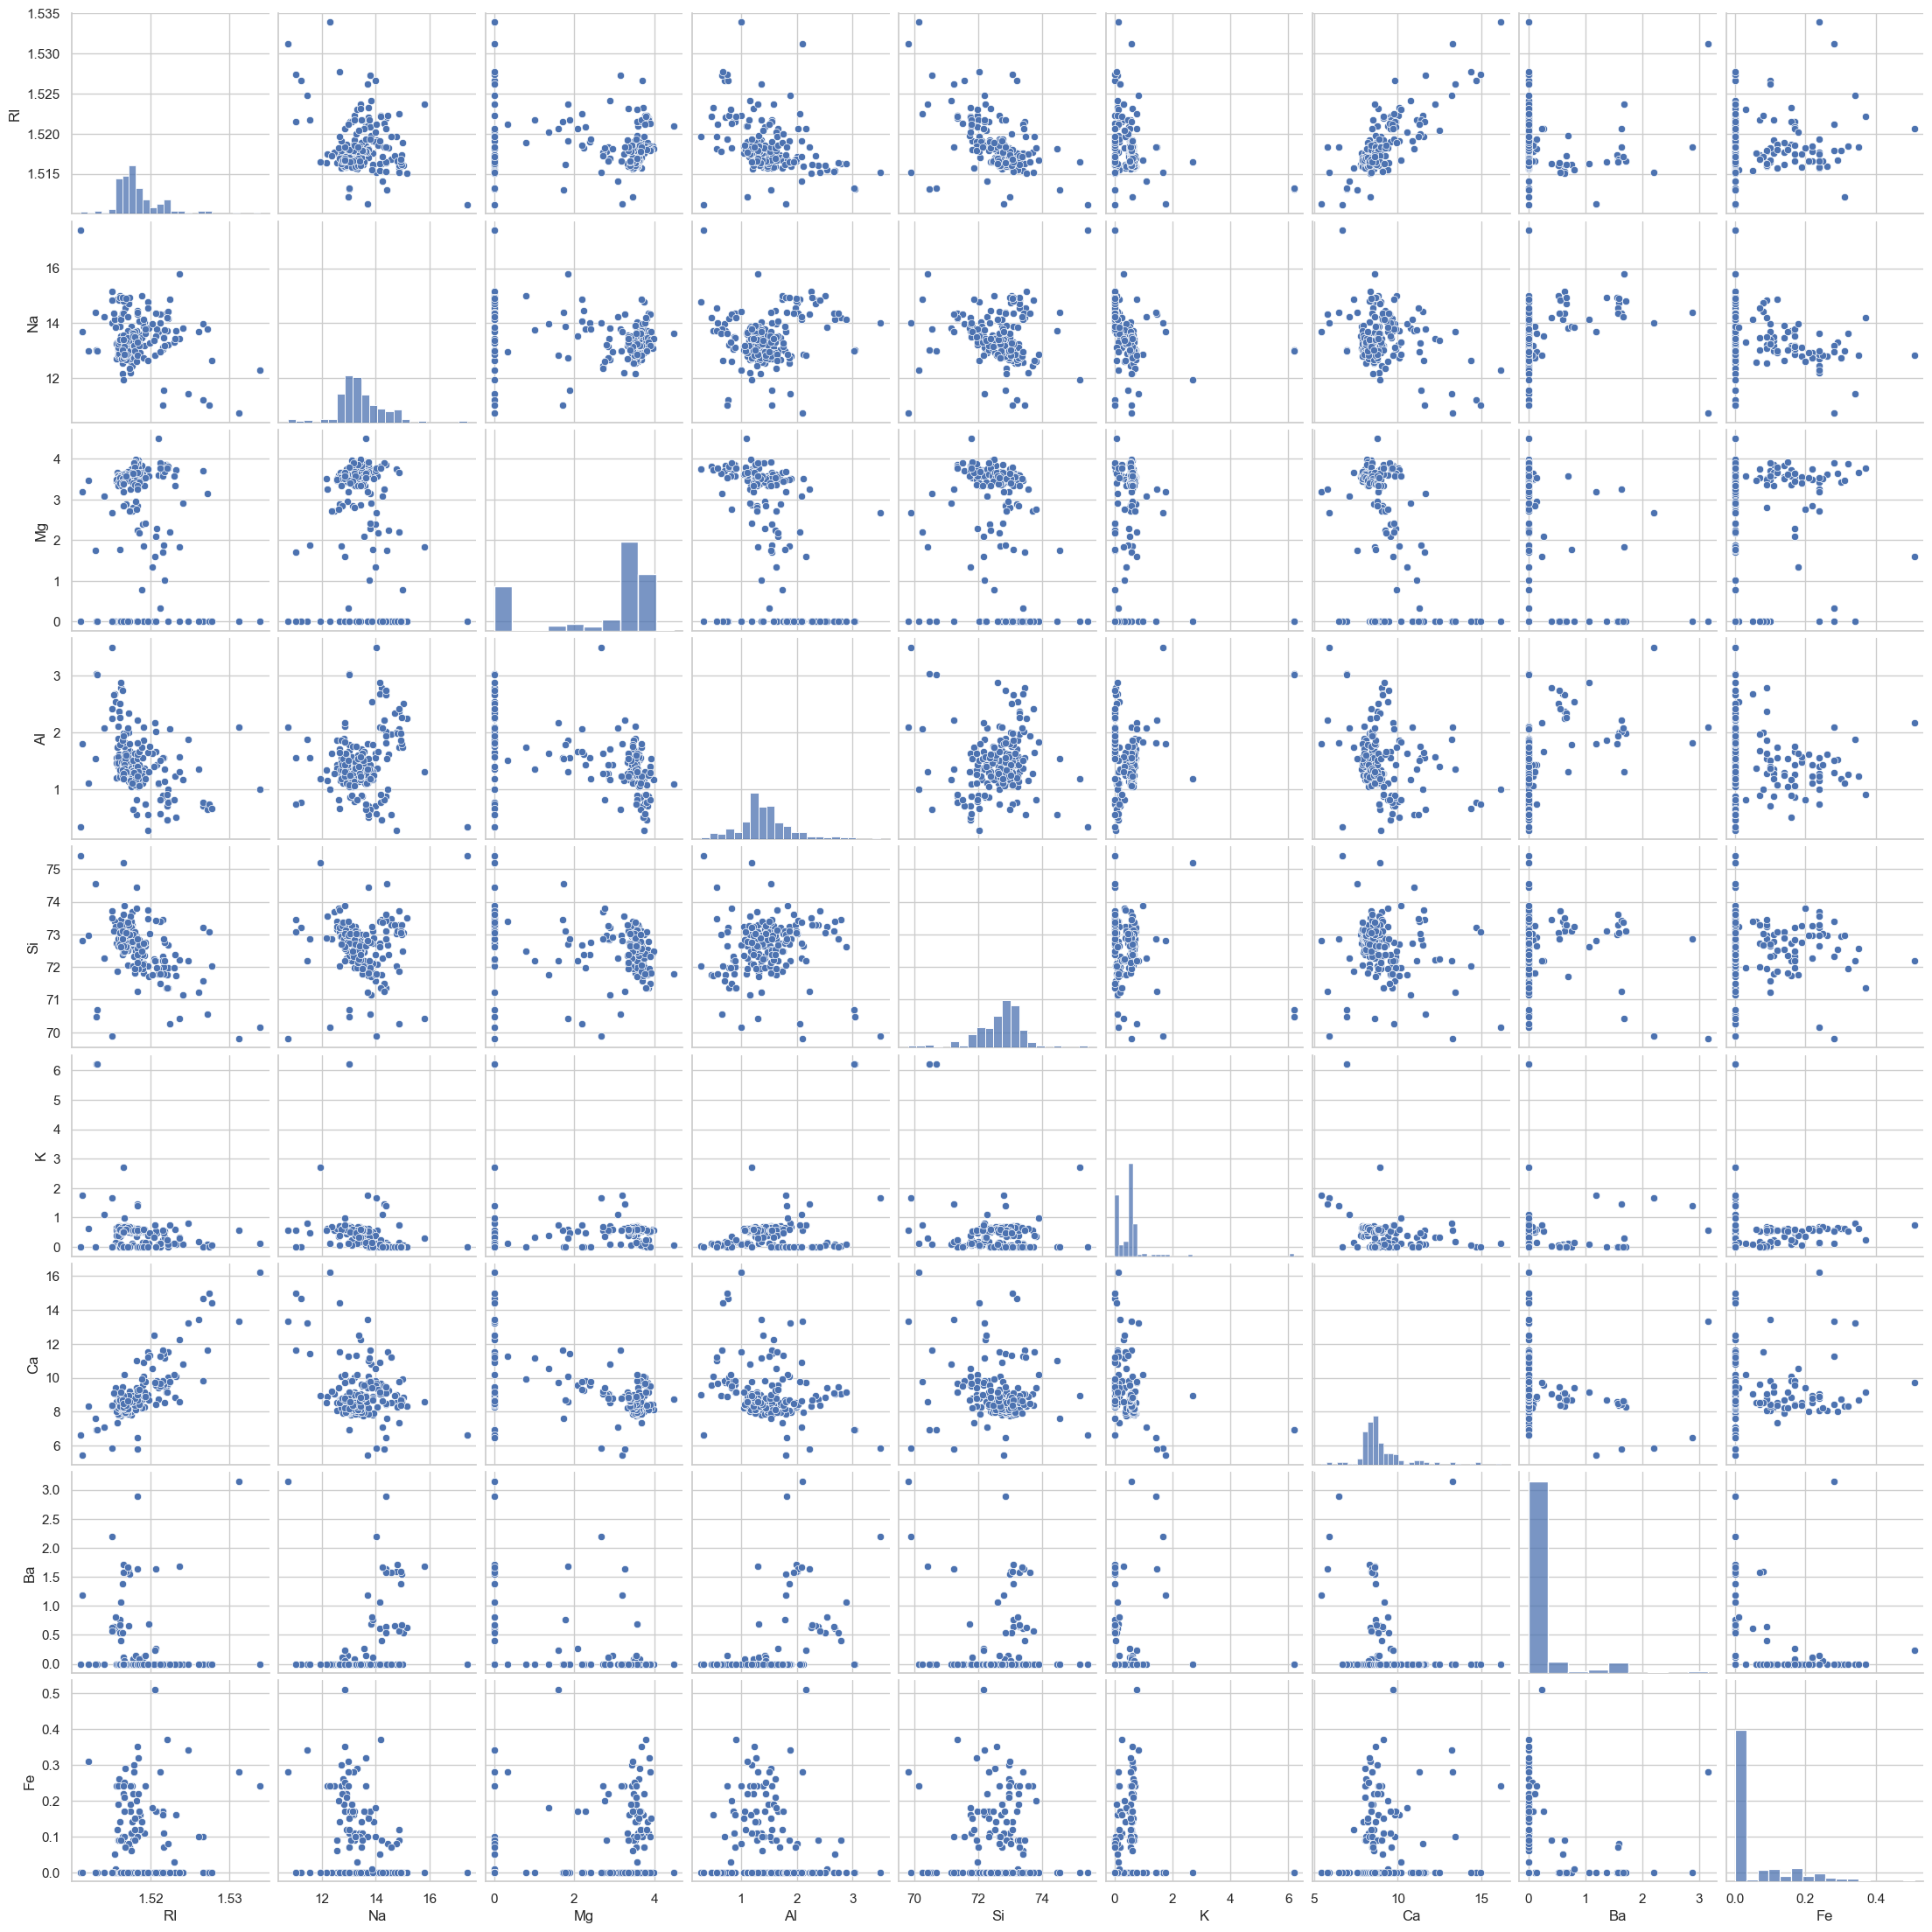

In [35]:
x2 = pd.DataFrame(x)

plt.figure(figsize=(8,8))
sns.pairplot(data = x2)
plt.show()

# Using Correlation Matrix

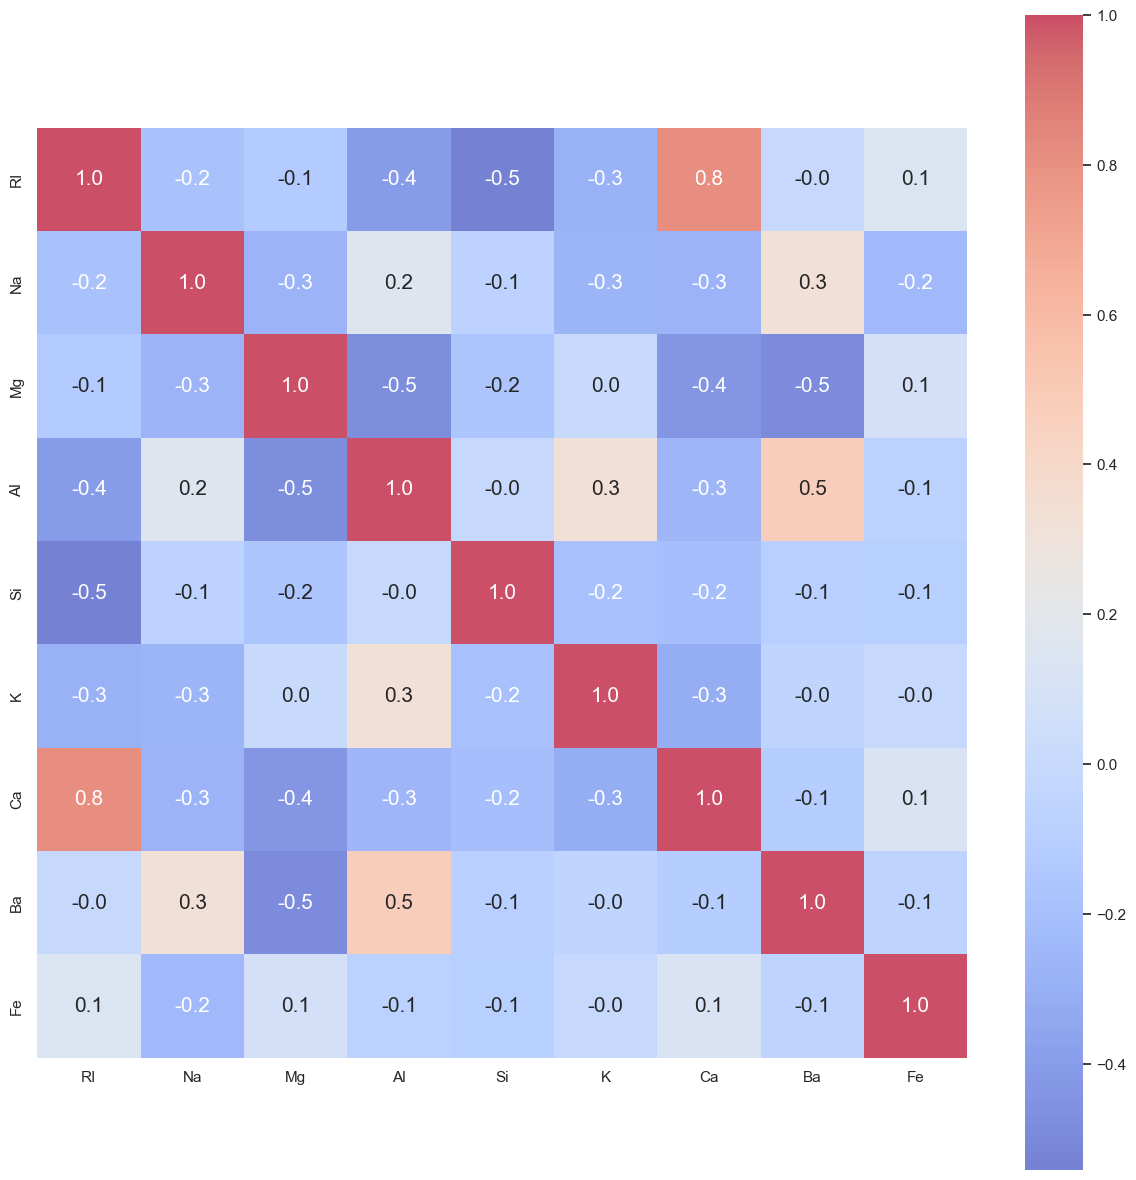

In [36]:
correlation = x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True,square =True, annot=True, fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

# Outlier Detection

In [49]:
#Detect observation with more than one outlier

from collections import Counter

def outlier_hunt(glass_df):
    outlier_indices = []
    
    for col in glass_df.columns.tolist():
        
        Q1 = np.percentile(glass_df[col], 25)
        Q3 = np.percentile(glass_df[col], 75)
        
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = glass_df[(glass_df[col] < Q1 - outlier_step) | (glass_df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_counts = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_counts.items() if v > 2]
    
    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' % (len(outlier_hunt(glass_df[features]))))

The dataset contains 14 observations with more than 2 outliers


# Data Treatment

In [50]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 1.Removing Outliers

In [51]:
outlier_indices = outlier_hunt(glass_df[features])
df = glass_df.drop(outlier_indices).reset_index(drop=True)

print(glass_df.shape)

(214, 10)


# 2. Normalizing the data

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [56]:
y.head()

,glass_type
0,1
1,1
2,1
3,1
4,1


# 3.Scaling The Features

In [57]:
from sklearn import preprocessing
x = preprocessing.scale(x)


# Visualization of Data after Being Preprocessed

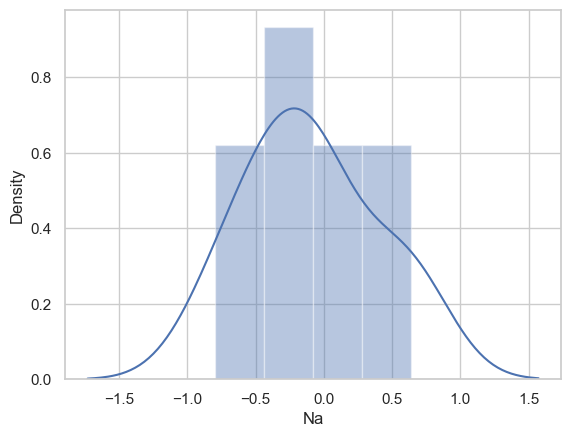

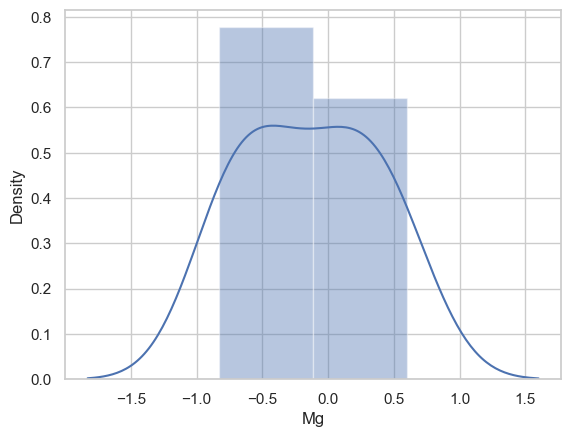

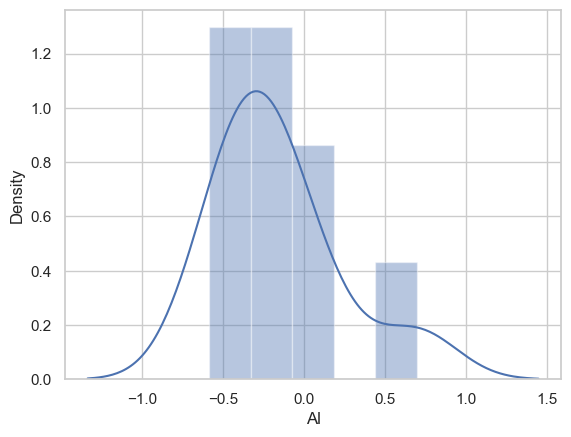

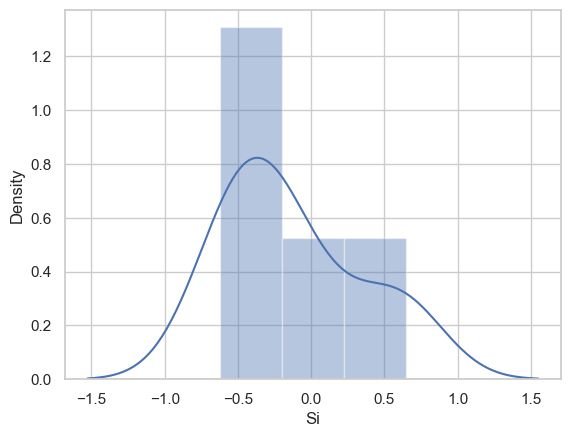

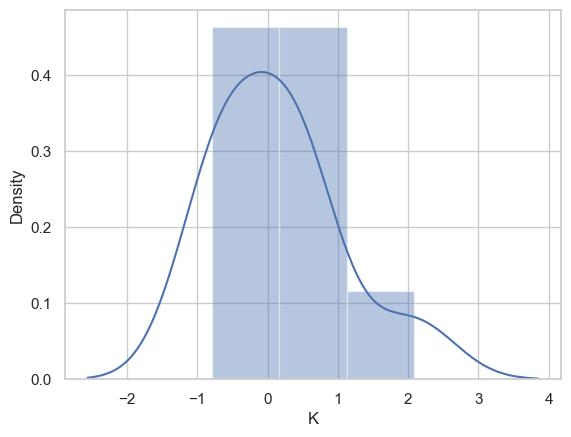

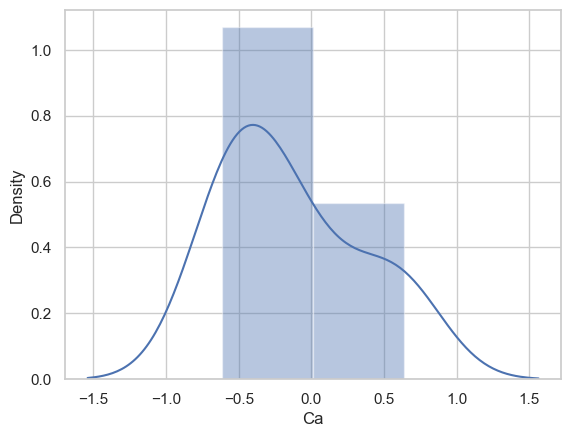

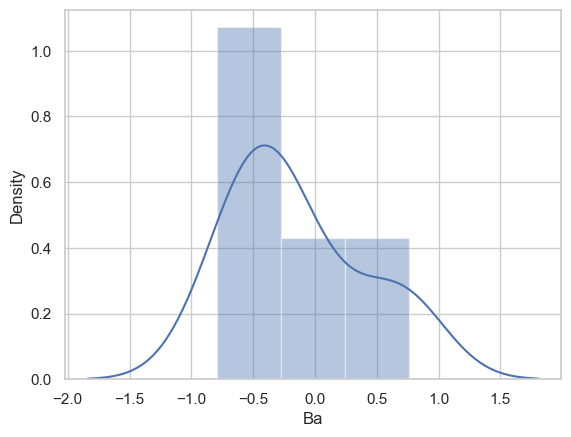

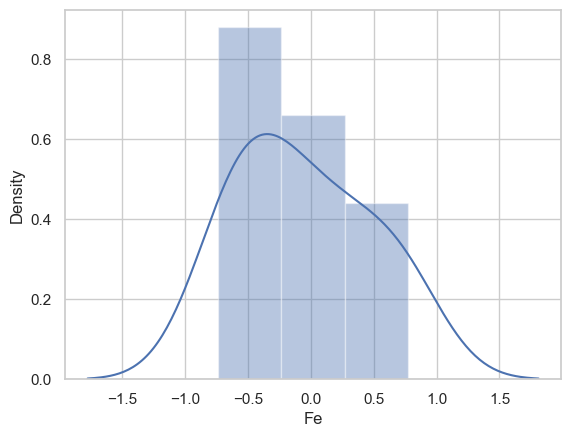

In [58]:
x2 = x 

for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

# Training set- Test set Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state=0, stratify = y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (107, 9)
Shape of X_test = (107, 9)
Shape of y_train = (107,)
Shape of y_test = (107,)


# Training Different Machine Learning Models

### K-Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    Scores.append(score)

print(knn.score(X_train, y_train))
print(Scores)

0.6728971962616822
[0.6355140186915887, 0.6261682242990654, 0.6542056074766355, 0.616822429906542, 0.6261682242990654, 0.6448598130841121, 0.6355140186915887, 0.6355140186915887, 0.6542056074766355]


### Decision Tree

In [64]:
Scores = []

for i in range(i):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    Scores.append(score)
    
print(tree.score(X_train, y_train))
print(Scores)

1.0
[0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289]


### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test, y_test)
    Scores.append(score)

print(logistic.score(X_train, y_train))
print(Scores)

0.6822429906542056
[0.5887850467289719]


### SVM Classifier (Non-Linear)

In [67]:
Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7570093457943925
[0.6822429906542056]
